In [1]:
import os, shutil
original_base_dir ="/Users/pushkarsinghbhauryal/downloads/pythontest/train"
base_dir= "/Users/pushkarsinghbhauryal/downloads/pythontest/cat_and_dog"
if not os.path.exists(base_dir):
    os.makedirs(base_dir)

In [2]:
train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)

In [3]:
train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.exists(train_cats_dir):
    os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.exists(train_dogs_dir):
    os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.exists(validation_cats_dir):
    os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.exists(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.exists(test_cats_dir):
    os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.exists(test_dogs_dir):
    os.mkdir(test_dogs_dir)

In [4]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500)]
for fname in fnames:
    src = os.path.join(original_base_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2500)]
for fname in fnames:
    src = os.path.join(original_base_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [5]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500)]
for fname in fnames:
    src = os.path.join(original_base_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [6]:
fnames = ['dog.{}.jpg'.format(i) for i in range(3000,4000)]
for fname in fnames:
    src = os.path.join(original_base_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [7]:
from keras import models
from keras import layers
model= models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [9]:
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])
from keras.preprocessing.image import ImageDataGenerator
train_datagen= ImageDataGenerator(rescale=1./255,rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
train_generator= train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=64,class_mode='binary')
validation_generator=test_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=20,class_mode='binary')

Found 3000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [12]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (50, 150, 150, 3)
labels batch shape: (50,)


In [11]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=80,
      epochs=70,
      validation_data=validation_generator,
      validation_steps=100)

Epoch 1/70
80/80 [==============================] - 151s 2s/step - loss: 0.6879 - acc: 0.5374 - val_loss: 0.6684 - val_acc: 0.5905
Epoch 2/70
80/80 [==============================] - 150s 2s/step - loss: 0.6746 - acc: 0.5775 - val_loss: 0.6567 - val_acc: 0.6080
Epoch 3/70
80/80 [==============================] - 156s 2s/step - loss: 0.6607 - acc: 0.5966 - val_loss: 0.6340 - val_acc: 0.6515
Epoch 4/70
80/80 [==============================] - 152s 2s/step - loss: 0.6442 - acc: 0.6239 - val_loss: 0.6241 - val_acc: 0.6480
Epoch 5/70
80/80 [==============================] - 154s 2s/step - loss: 0.6240 - acc: 0.6508 - val_loss: 0.6869 - val_acc: 0.6010
Epoch 6/70
80/80 [==============================] - 150s 2s/step - loss: 0.6084 - acc: 0.6631 - val_loss: 0.5854 - val_acc: 0.6890
Epoch 7/70
80/80 [==============================] - 156s 2s/step - loss: 0.6059 - acc: 0.6707 - val_loss: 0.6747 - val_acc: 0.6055
Epoch 8/70
80/80 [==============================] - 151s 2s/step - loss: 0.5958 - a

80/80 [==============================] - 153s 2s/step - loss: 0.4060 - acc: 0.8129 - val_loss: 0.4395 - val_acc: 0.8055
Epoch 64/70
80/80 [==============================] - 151s 2s/step - loss: 0.3982 - acc: 0.8155 - val_loss: 0.4249 - val_acc: 0.8095
Epoch 65/70
80/80 [==============================] - 152s 2s/step - loss: 0.3958 - acc: 0.8199 - val_loss: 0.4395 - val_acc: 0.7920
Epoch 66/70
80/80 [==============================] - 151s 2s/step - loss: 0.3996 - acc: 0.8127 - val_loss: 0.4341 - val_acc: 0.8115
Epoch 67/70
80/80 [==============================] - 159s 2s/step - loss: 0.3849 - acc: 0.8282 - val_loss: 0.4028 - val_acc: 0.8285
Epoch 68/70
80/80 [==============================] - 151s 2s/step - loss: 0.3900 - acc: 0.8175 - val_loss: 0.4152 - val_acc: 0.8310
Epoch 69/70
80/80 [==============================] - 162s 2s/step - loss: 0.3886 - acc: 0.8250 - val_loss: 0.4134 - val_acc: 0.8140
Epoch 70/70
80/80 [==============================] - 155s 2s/step - loss: 0.3922 - acc: 

In [12]:
model.save('cats_and_dogs_small_2.h5')
import matplotlib.pyplot as plt
%matplotlib inline
acc= history.history['acc']
val_acc= history.history['val_acc']
loss= history.history['loss']
val_loss=history.history['val_loss']
epoch= range(1,len(acc)+1)

Text(0,0.5,'Accuracy')

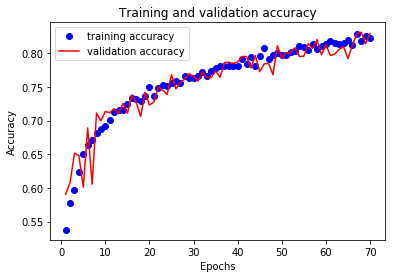

In [13]:
plt.plot(epoch,acc,'bo',label='training accuracy')
plt.plot(epoch,val_acc,'r',label='validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0,0.5,'Loss')

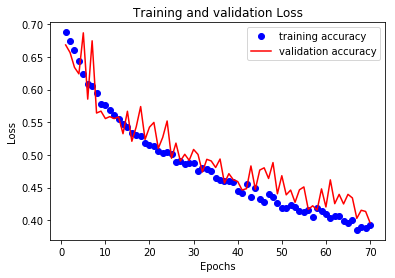

In [15]:
plt.figure()
plt.plot(epoch,loss,'bo',label='training accuracy')
plt.plot(epoch,val_loss,'r',label='validation accuracy')
plt.title('Training and validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')